In [1]:
""" goal: analysis of kineamtics of trials.
align multiople trials of same task.
assess statistics of actions

PANCHO:
200223 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line - 118
200223 - pilot - 2
{'Trace (instant)'}
line - 375
200223 - pilot - 3
{'Trace (instant)'}
line - 198
200224 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line - 34
200224 - pilot - 2
{'Trace (instant)', 'Trace (pursuit,track)'}
line - 6
200225 - pilot - 3
{'Trace (instant)'}
line - 169
200226 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line - 116
200226 - pilot - 2
{'Trace (instant)'}
line - 88
200226 - pilot - 3
{'Trace (instant)'}
line - 37
200226 - pilot - 4
{'Trace (instant)'}
line - 12
200226 - pilot - 5
{'Trace (instant)'}
line - 28
200226 - pilot - 6
{'Trace (instant)'}
line - 19
200226 - pilot - 7
{'Trace (instant)'}
line - 115

MO:
200219 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 153
200219 - pilot - 2
{'Trace (instant)'}
line - 16
200219 - pilot - 3
{'Trace (instant)'}
line - 54
200220 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 20
200220 - pilot - 2
{'Trace (instant)', 'Trace (pursuit,track)'}
line - 615
line_natural - 15
200220 - pilot - 3
{'Trace (instant)'}
line - 27
200220 - pilot - 4
{'Trace (instant)'}
line - 54
200220 - pilot - 5
{'Trace (instant)'}
line - 271
200221 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 8
200221 - pilot - 2
{'Trace (pursuit,track)'}
line_natural - 6
200221 - pilot - 3
{'Trace (pursuit,track)'}
line_natural - 1
200221 - pilot - 4
{'Trace (pursuit,track)'}
line_natural - 10
200221 - pilot - 5
{'Trace (pursuit,track)'}
line_natural - 18
200221 - pilot - 8
{'Trace (pursuit,track)'}
line_natural - 1
200221 - pilot - 9
{'Trace (pursuit,track)'}
line_natural - 59
200222 - pilot - 2
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 6
200222 - pilot - 3
{'Trace (pursuit,track)'}
line_natural - 48
200222 - pilot - 4
{'Trace (pursuit,track)'}
line_natural - 3
200223 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 25
200223 - pilot - 2
{'Trace (instant)', 'Trace (pursuit,track)'}
line - 179
line_natural - 9
200223 - pilot - 3
{'Trace (instant)'}
line - 115
200223 - pilot - 4
{'Trace (instant)'}
line - 56
200224 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 31
200224 - pilot - 2
{'Trace (pursuit,track)'}
line_natural - 10
200224 - pilot - 4
{'Trace (pursuit,track)'}
line_natural - 13
200225 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 11
200225 - pilot - 2
{'Trace (pursuit,track)'}
line_natural - 1
200225 - pilot - 3
{'Trace (pursuit,track)'}
line_natural - 6
200225 - pilot - 4
{'Trace (pursuit,track)'}
line_natural - 28
200225 - pilot - 5
{'Trace (instant)'}
line - 13
200225 - pilot - 6
{'Trace (pursuit,track)'}
line_natural - 13
200226 - pilot - 1
{'Trace (instant)', 'Trace (pursuit,track)'}
line_natural - 19
200226 - pilot - 2
{'Trace (instant)'}
line - 206
200226 - pilot - 3
{'Trace (instant)'}
line - 41
200226 - pilot - 4
{'Trace (instant)'}
line - 23
200226 - pilot - 6
{'Trace (instant)'}
line - 42
"""

%load_ext autoreload
%autoreload 2

from tools.utils import * 
from tools.plots import *
from tools.analy import *
from tools.calc import *
from tools.analyplot import *

NOTE: need to not overwrite strokes_all_task, because then the orders saved will stop being accurate. Modify


In [2]:
# animal = "Pancho";
# date = 200226
# expt = "pilot"
# session = 1
animal = "Mo";
date = 200226
expt = "pilot"
session = 2

from tools.preprocess import *
filedata = loadSingleData(animal, date, expt, session, resave_as_dict=False, load_resaved_data=True, 
                      resave_overwrite=False)

from tools.utils import *
getMultTrialsTaskStages(filedata)

found one matching filename: ['/data2/animals/Mo/200226/200226_125426_pilot_Mo_2.h5']
found one matching filename: ['/data2/animals/Mo/200226/200226_125426_pilot_Mo_2.pkl']
-- loaded presaved data: /data2/animals/Mo/200226/200226_125426_pilot_Mo_2.pkl
got 825 total trials


{'one_dot': 49, 'line': 206, 'circle_partial': 570}

In [3]:
# -- collect d## FILTER TO FIND GOOD TRIALS, - PLOT THOSE
# --- for a given set of trials, collect trajectories for all of them

targ = {
    "task_stage":["line"],
    "behtype":["Trace (instant)"],    
    "fracsuccess_min":[0.01] # only trials where touched 
}

trials_list = getIndsTrials(filedata, targ)

got 155 total trials


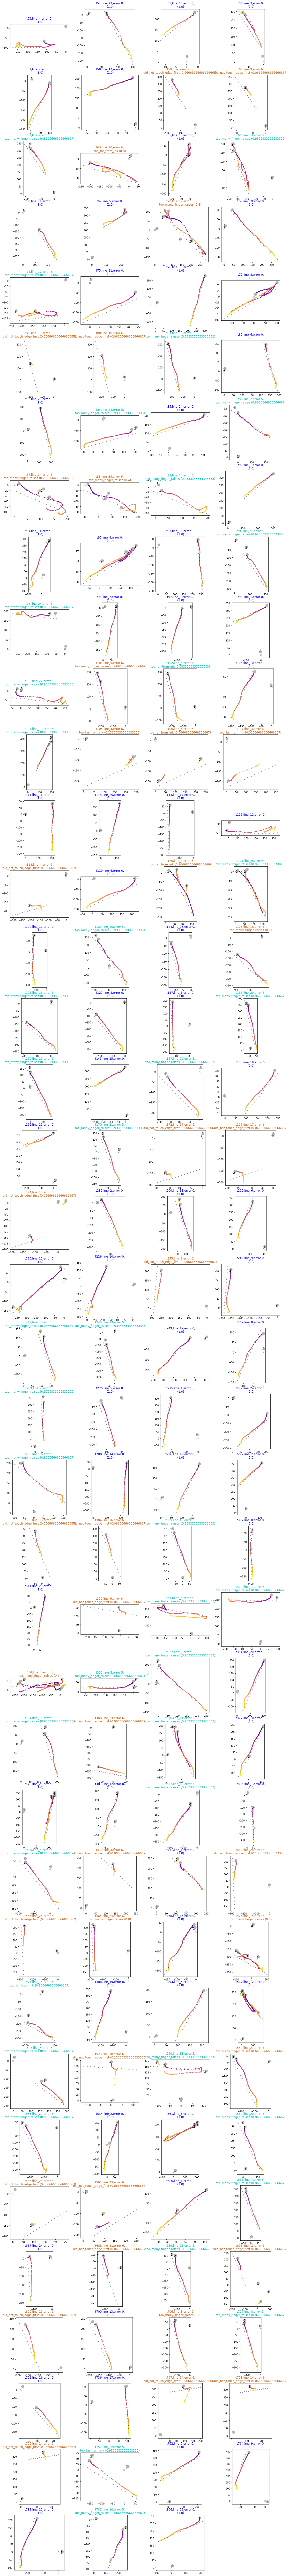

In [4]:
# -- overview
plotMultTrialsSimple(filedata, trials_list, zoom=True) 

[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime


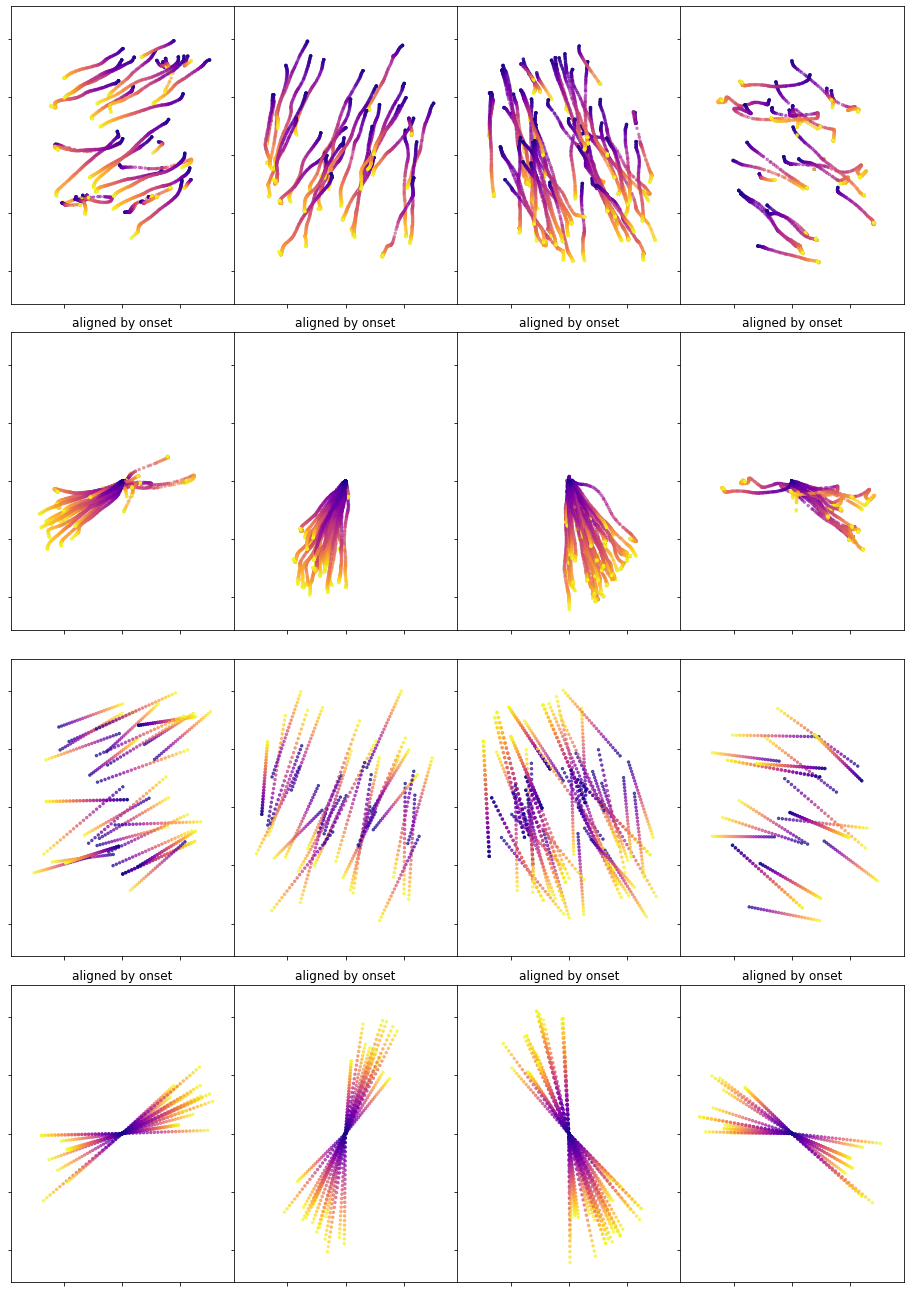

In [5]:
from tools.analyplot import plotDictwrapperSplitByAngle

# ======================== PLOTS
name = "good_line_analysis_040820"
savedir = f"{filedata['params']['figuredir_notebook']}/{name}/{animal}_{date}_{session}"
import os 
os.makedirs(savedir, exist_ok=True)

# ====
subsample_trials=None
fig, axes = plotDictwrapperSplitByAngle(filedata, trials_list, faketimesteps_ver="from_orig",
                      subsample_trials=subsample_trials)
fig.savefig(f"{savedir}/splitbyangle.pdf")


[getTrialsStrokes] removing stroke for calc vel since shorter than window


/data1/code/MonkeyLogic2/analysis/tools/analyplot.py:224: RuntimeWarning: invalid value encountered in greater
  p = (np.sum(circ_var_shuff<cv(angles_to_plot))+1)/(nshuff+1)
/data1/code/MonkeyLogic2/analysis/tools/analyplot.py:224: RuntimeWarning: invalid value encountered in greater
  p = (np.sum(circ_var_shuff<cv(angles_to_plot))+1)/(nshuff+1)
/home/lucast4/miniconda3/envs/drag/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


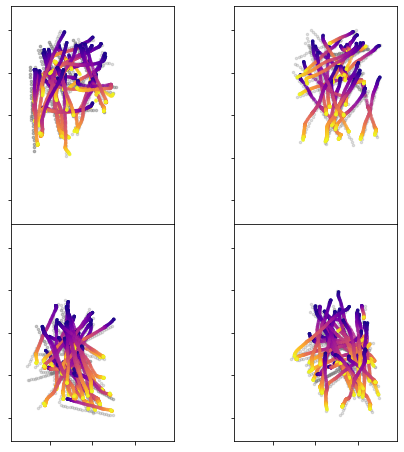

/home/lucast4/miniconda3/envs/drag/lib/python3.7/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


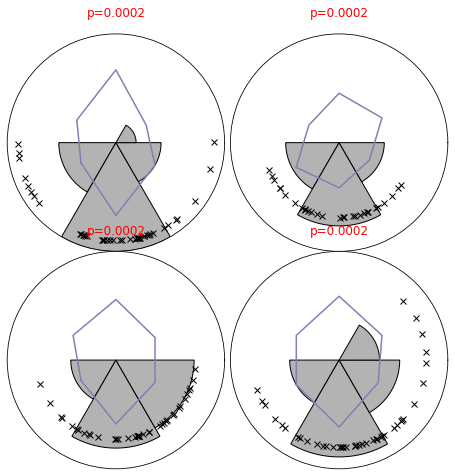

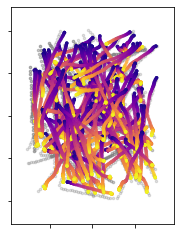

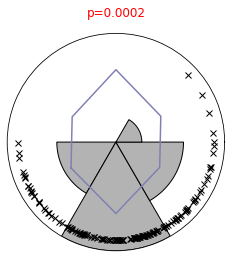

In [10]:
## [GOOD - rose plots] 
stroke_dict = getMultTrialsStrokeDict(filedata, trials_list)
# stroke_dict = processFakeTimesteps(stroke_dict, filedata, key_to_do="strokes_all_task", ver=faketimesteps_ver,
#                                   replace_key_to_do=True)
# #     stroke_dict = processAngles(stroke_dict, stroke_to_use="first_two_points", force_use_two_points=True)
# stroke_dict = processAngles(stroke_dict, stroke_to_use="first_two_points", force_use_two_points=True)

nbins_x = 2
nbins_y = 2
figsall = plotDictGridOverlay(stroke_dict, filedata, nbins_x=nbins_x, nbins_y=nbins_y)
for i, fig in enumerate(figsall):
    fig.savefig(f"{savedir}/roseplot_x{nbins_x}_y{nbins_y}_{i}.pdf")

nbins_x = 1
nbins_y = 1
figsall = plotDictGridOverlay(stroke_dict, filedata, nbins_x=nbins_x, nbins_y=nbins_y)
for i, fig in enumerate(figsall):
    fig.savefig(f"{savedir}/roseplot_x{nbins_x}_y{nbins_y}_{i}.pdf")


[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime
dfgasdgdgdfg
[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime
[getTrialsStrokes] removing stroke for calc vel since shorter than window
NOTE: replaced strokes_all_task with values in strokes_all_task_faketime


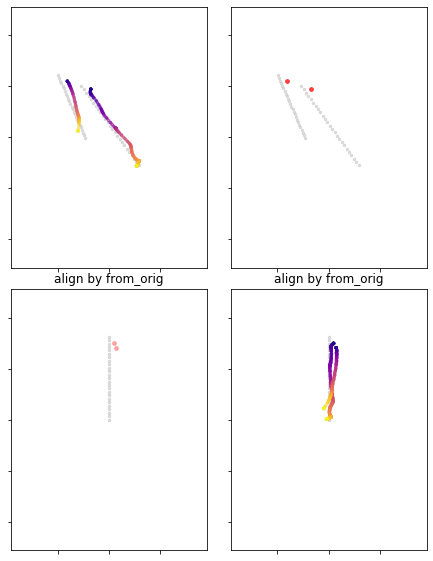

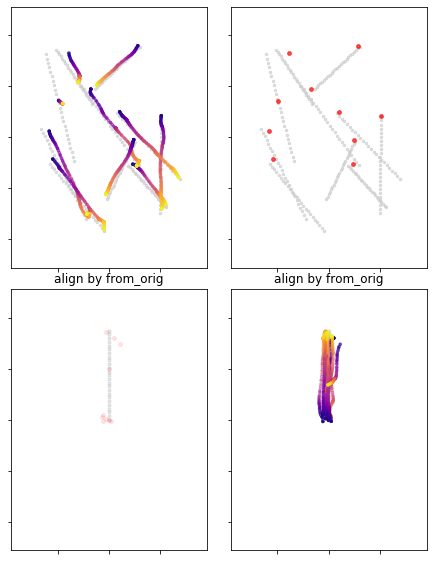

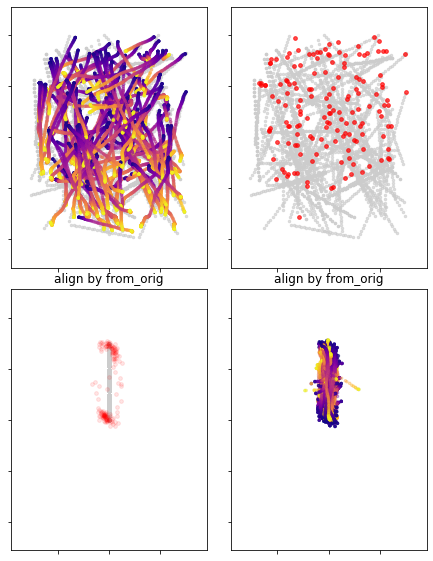

In [11]:
## [GOOD - ALIGNEMNT] ======== PLOT DISTRIBUTION OF TOUCH ONSETS RELATIVE TO TASK 
from tools.analyplot import plotDictwrapperAligned

# ======================== PLOTS

# ====
subsample_trials=2
fig, axes = plotDictwrapperAligned(filedata, trials_list, faketimesteps_ver="from_orig",
                      subsample_trials=subsample_trials)
fig.savefig(f"{savedir}/alignment_subset{subsample_trials}.pdf")

# ====
subsample_trials=10
fig, axes = plotDictwrapperAligned(filedata, trials_list, faketimesteps_ver="from_orig",
                      subsample_trials=subsample_trials)
fig.savefig(f"{savedir}/alignment_subset{subsample_trials}.pdf")

# ====
subsample_trials=None
fig, axes = plotDictwrapperAligned(filedata, trials_list, faketimesteps_ver="from_orig",
                      subsample_trials=subsample_trials)
fig.savefig(f"{savedir}/alignment.pdf")